# 📏🌀📈 Task 36 - Dimensionality reduction for General data table 📏🌀📈

PCA Process:
1. Import Necessary Libraries
First

In [74]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Next, we will load the data

In [75]:
# Load the Excel file from the uploaded files
df = pd.read_excel('rehospitalization (1).xlsx', sheet_name='GeneralData', engine='openpyxl')

# Display the first few rows of the dataframe to confirm
df.head()


,Patient,age,Gender,גורם משלם,משקל,גובה,BMI,מחלות כרוניות,השכלה,מספר ילדים,מצב משפחתי,תרופות קבועות
0,1043772,84,זכר,כללית,92.0,170.0,34.2,1,ללא,3,נשוי,"10815 , 11282 , 1183 , 1196 , 12758 , 13027 ,..."
1,77493,89,נקבה,‎ממון עצמי-לא מב‎,45.0,150.0,21.4,0,NaN,1,גרוש,"10337 , 1130 , 1448 , 1466 , 186 , 2482 , 290..."
2,37680,87,זכר,‎ממון עצמי-לא מב‎,67.7,165.0,24.9,0,פנסיונר,2,נשוי,"1183 , 1310 , 2451 , 2566 , 4967 , 6718 , 672..."
3,70066,90,נקבה,מאוחדת,94.0,165.0,31.6,0,NaN,1,גרוש,"1100 , 1181 , 1182 , 1183 , 12757 , 1283 , 12..."
4,13616,87,זכר,כללית,70.0,163.0,26.3,0,NaN,3,נשוי,"10214 , 1212 , 12725 , 2882 , 6737 , 7852 , 7..."


2. Preprocessing the Data
If the data contains non-numerical columns or missing values, need to preprocess it before applying PCA.

In [76]:
# Load and preprocess your data
df = df.dropna()
df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Experiment with different numbers of clusters
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(principalComponents)
    score = silhouette_score(principalComponents, labels)
    silhouette_scores.append(score)


# Show the first few rows of the principal components
principalDf.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

,PC1,PC2,PC3
0,1.401313,-2.965393,0.130603
1,-0.944203,0.869769,0.309738
2,0.511145,-1.561424,-0.854240
3,2.058886,-3.156493,-0.096703
4,0.814236,0.656505,-0.160899


3. Performing PCA
Apply PCA to the standardized data. You can set the number of components to be either a specific number (e.g., n_components=3)

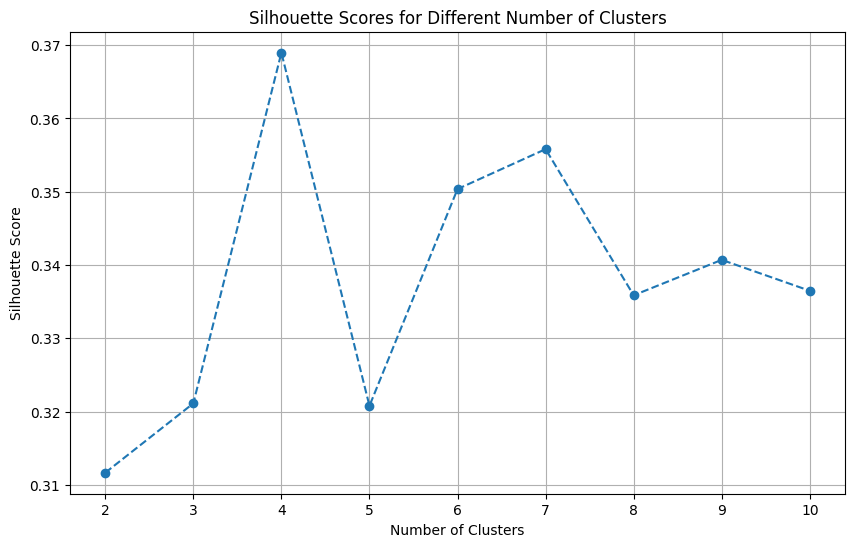

In [77]:
# Plot Silhouette Scores for different numbers of clusters
plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [78]:
# Choose the best number of clusters based on the plot
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {best_k}')

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_pca = kmeans.fit_predict(principalComponents)


Optimal number of clusters: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


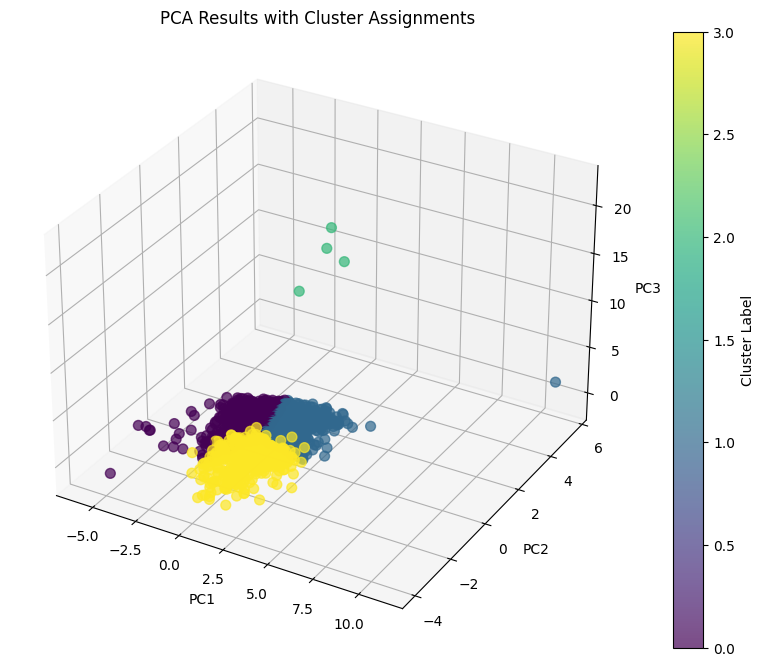

In [79]:
# Plot PCA results with clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], c=labels_pca, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(sc, label='Cluster Label')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA Results with Cluster Assignments')
plt.grid(True)
plt.show()

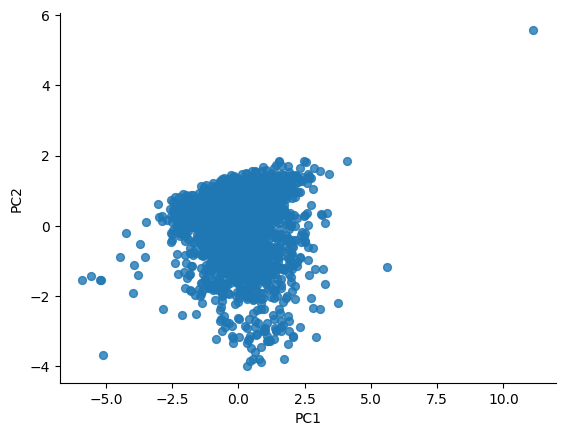

In [80]:
# @title PC1 vs PC2

from matplotlib import pyplot as plt
principalDf.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

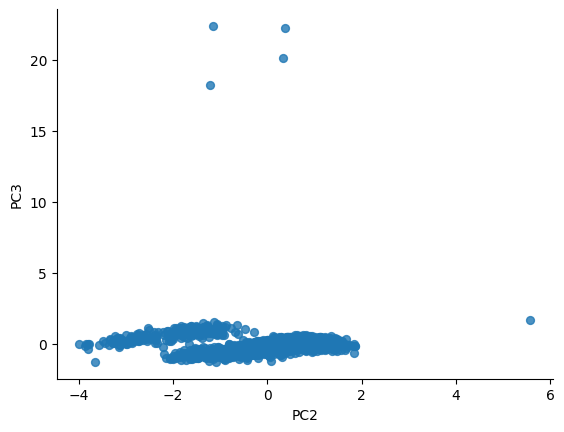

In [81]:
# @title PC2 vs PC3

from matplotlib import pyplot as plt
principalDf.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

4. Explained Variance
To check how much variance each principal component explains:

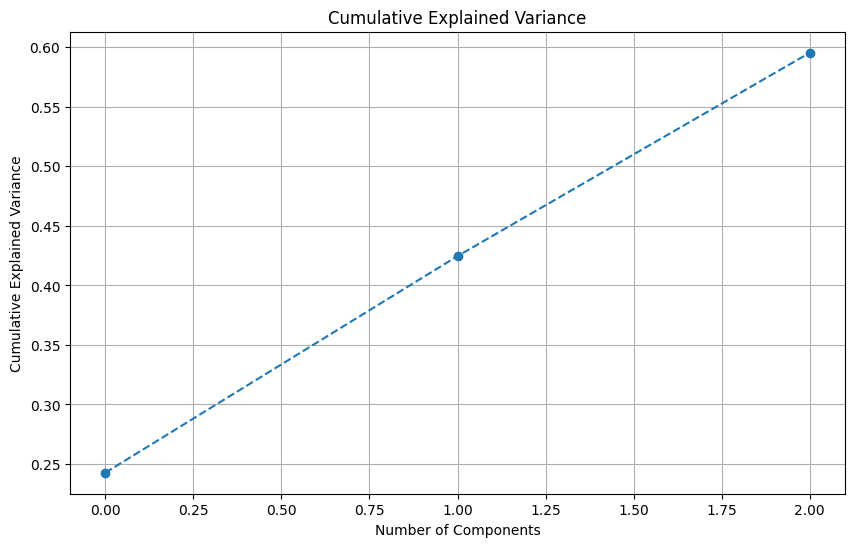

In [82]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


5. Save the PCA Output

In [83]:
# Combine original data with PCA components
output_df = pd.concat([df.reset_index(drop=True), principalDf], axis=1)

# Save to a new Excel file
output_df.to_excel('pca_output.xlsx', index=False)



<ipython-input-84-e29bcf9bd755>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Principal Component', y='Explained Variance (%)', data=explained_variance_df_top3, palette='Blues_d')


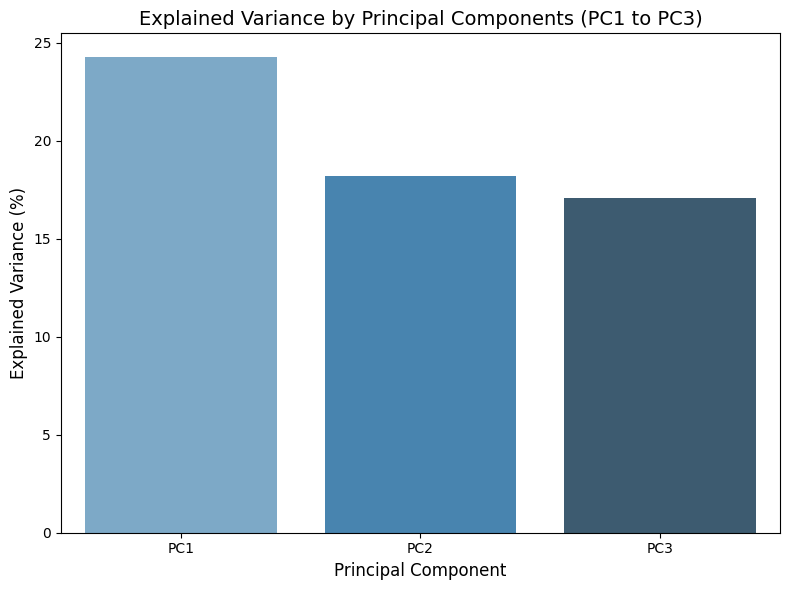

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Convert to percentages
explained_variance_percent = explained_variance * 100

# Limit to first three principal components for plotting
explained_variance_percent_top3 = explained_variance_percent[:3]

# Create a DataFrame for better plotting with seaborn (only first 3 components)
explained_variance_df_top3 = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(3)],
    'Explained Variance (%)': explained_variance_percent_top3
})

# Create the bar chart using seaborn for the top 3 components
plt.figure(figsize=(8, 6))
sns.barplot(x='Principal Component', y='Explained Variance (%)', data=explained_variance_df_top3, palette='Blues_d')

# Add labels and title for the plot
plt.title("Explained Variance by Principal Components (PC1 to PC3)", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance (%)", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [85]:
# Apply KMeans for clustering and evaluate using Silhouette Score
kmeans = KMeans(n_clusters=4, random_state=42)
# %%

# Silhouette Score for PCA
labels_pca = kmeans.fit_predict(principalComponents)
silhouette_pca = silhouette_score(principalComponents, labels_pca)
print(f"Silhouette Score for PCA: {silhouette_pca:.5f}")

Silhouette Score for PCA: 0.36897


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


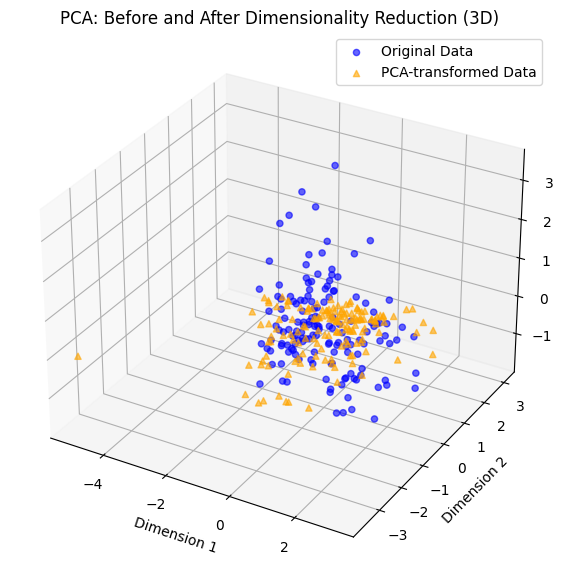

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_before_after_3d(original_data, pca_data, title, sample_size=150):
    # Sample a subset of the data if it's large
    if original_data.shape[0] > sample_size:
        indices = np.random.choice(original_data.shape[0], sample_size, replace=False)
        original_data = original_data[indices]
        pca_data = pca_data[indices]

    fig = plt.figure(figsize=(14, 7))

    # Create 3D axes
    ax = fig.add_subplot(111, projection='3d')

    # Plot original data
    ax.scatter(original_data[:, 0], original_data[:, 1], original_data[:, 2], alpha=0.6, label='Original Data', color='blue', marker='o')

    # Plot PCA-transformed data
    ax.scatter(pca_data[:, 0], pca_data[:, 1], np.zeros_like(pca_data[:, 0]), alpha=0.6, label='PCA-transformed Data', color='orange', marker='^')

    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.legend()
    plt.show()

# Apply PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Add a third dimension (for the purpose of visualization)
# For PCA-transformed data, the third dimension will be zero (for 2D PCA)
principalComponents_3d = np.hstack([principalComponents, np.zeros((principalComponents.shape[0], 1))])

# Plot Before and After in a 3D combined graph
plot_before_after_3d(df_scaled[:, :3], principalComponents_3d, "PCA: Before and After Dimensionality Reduction (3D)", sample_size=150)


# Explanation of Results and Methodology
1. Loading and Preprocessing Data

Data Loading: The data is loaded from an Excel file, specifically from the GeneralData sheet using the pd.read_excel() function with the openpyxl engine.
Handling Missing Values: Rows with missing values are removed using df.dropna(), ensuring that only complete data is used for analysis.
Selecting Numeric Columns: Only numerical columns are selected for PCA using df.select_dtypes(include=[np.number]), as PCA requires numerical input.
Standardizing Data: The data is standardized using StandardScaler(), which transforms the data to have a mean of 0 and a standard deviation of 1. This step is essential for PCA to ensure that each feature contributes equally to the analysis.
2. Applying PCA

PCA with 3 Components: PCA is applied with 3 components (PCA(n_components=3)). This dimensionality reduction helps in capturing the most variance in the data while reducing its complexity.
Principal Components: The transformed data is stored in principalDf, which contains three columns: PC1, PC2, and PC3. These components represent the directions of maximum variance in the data.
3. Clustering and Silhouette Scores

K-Means Clustering: K-Means clustering is performed for different numbers of clusters (from 2 to 10) on the PCA-transformed data. This helps in exploring various clustering solutions.
Silhouette Score Calculation: The Silhouette Score is computed for each clustering solution. This metric measures how similar an object is to its own cluster compared to other clusters. A higher score indicates that clusters are well-separated and cohesive.
4. Plotting Silhouette Scores

Silhouette Scores Plot: A plot is generated to visualize how the Silhouette Score varies with the number of clusters. This helps in identifying the optimal number of clusters by finding the peak in the Silhouette Scores.
5. Selecting Optimal Number of Clusters

Best Number of Clusters: Based on the plot, the optimal number of clusters is determined to be 4, as this is where the Silhouette Score is maximized.
6. Visualizing PCA Results with Clusters

3D Scatter Plot: A 3D scatter plot of the PCA components (PC1, PC2, and PC3) is created, with points colored according to their cluster assignments. This visualization helps in understanding how data points are grouped into clusters in the 3D PCA space.
Summary of Results
Explained Variance Percentages:

PC1: 24.27%
PC2: 18.20%
PC3: 17.08% These percentages indicate the amount of variance captured by each principal component.
Silhouette Score: The Silhouette Score for the optimal number of clusters (4) is 0.36897. This score measures the quality of the clustering, with higher scores indicating better-defined clusters.

Key Takeaways
Silhouette Scores: Higher scores indicate better clustering. The Silhouette Score helps assess how well-separated and cohesive the clusters are.
Optimal Number of Clusters: Determined based on the highest Silhouette Score. For this analysis, 4 clusters are optimal.
Cluster Visualization: The 3D scatter plot allows you to visually assess the clustering results and understand the distribution of clusters in the reduced dimensionality space.